[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Kreidenweis_et_al_2003/fig_1.ipynb) 
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Kreidenweis_et_al_2003/fig_1.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Kreidenweis_et_al_2003/fig_1.ipynb)

#### based on Fig. 1 from Kreidenweis et al. 2003 (J. Geophys. Res. 108)  "_Modification of aerosol mass and size distribution due to aqueous‐phase SO2 oxidation in clouds: Comparisons of several models_"   
https://doi.org/10.1029/2002JD002697

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [7]:
from PySDM_examples.Kreidenweis_et_al_2003 import Settings, Simulation
from open_atmos_jupyter_utils import show_plot
from PySDM.physics import si
import numpy as np
from matplotlib import pyplot

In [3]:
settings = Settings(dt=.25*si.s, n_sd=20, n_substep=1)
settings.output_interval = 25 * si.s

In [4]:
simulation = Simulation(settings)

In [5]:
output = simulation.run()

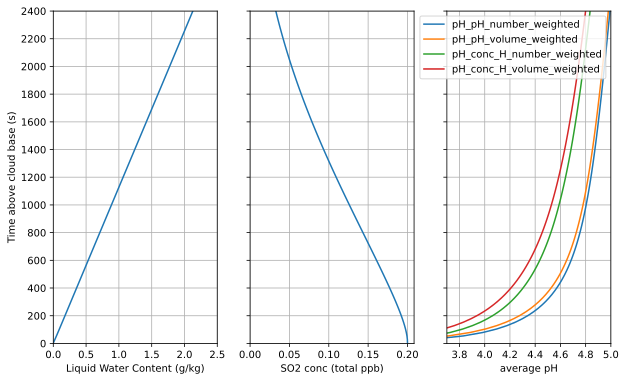

HTML(value="<a href='./fig_1.pdf' target='_blank'>./fig_1.pdf</a><br>")

In [8]:
figsize = (10, 6)
fig, axs = pyplot.subplots(1, 3, figsize=figsize, sharey=True)

Y = np.asarray(output['t']) - 196 * si.s

axs[0].plot(output['liquid water mixing ratio'], Y)
axs[0].set_ylim(0, 2400 * si.s)
axs[0].set_xlim(0, 2.5)
axs[0].set_yticks(np.linspace(0, 2400, 13, endpoint=True))
axs[0].set_ylabel('Time above cloud base (s)')
axs[0].set_xlabel('Liquid Water Content (g/kg)')

axs[1].plot(np.asarray(output['aq_S_IV_ppb']) + np.asarray(output['gas_S_IV_ppb']), Y)
axs[1].set_xticks(np.linspace(0, 0.2, 5, endpoint=True))
axs[1].set_xlabel('SO2 conc (total ppb)')

for product in (
    'pH_pH_number_weighted', 
    'pH_pH_volume_weighted', 
    'pH_conc_H_number_weighted', 
    'pH_conc_H_volume_weighted'
):
    axs[2].plot(output[product], Y, label=product)
axs[2].set_xlim(3.7, 5)
axs[2].set_xticks(np.linspace(3.8, 5, 7, endpoint=True))
axs[2].set_xlabel('average pH')
axs[2].legend()

for ax in axs:
    ax.grid()
show_plot('fig_1.pdf')